#### Hotel Booking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/Users/jiawenli/Desktop/MBAN_6110T/Project/hotel_booking.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Data Cleaning

In [4]:
# Handling missing values in the 'children' column by filling with 0
df['children'].fillna(0, inplace=True)

In [5]:
# Handling missing values in the 'company' column by creating a new feature 'is_company_present'
df['is_company_present'] = df['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
#df.drop(columns=['company'], inplace=True)

In [6]:
# Handling missing values in the 'country' column by imputing with the most frequent country
most_frequent_country = df['country'].mode().iloc[0]
df['country'].fillna(most_frequent_country, inplace=True)
# df.drop(columns=['country'], inplace=True)

In [7]:
# Handling missing values in the 'agent' column by filling with -1
df['agent'].fillna(-1, inplace=True)
#Ease of Interpretation: Using a specific value like -1 to represent missing data 
# makes it easy to identify and interpret missing values during the analysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Descriptive Statistics
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

#### Data Visualization

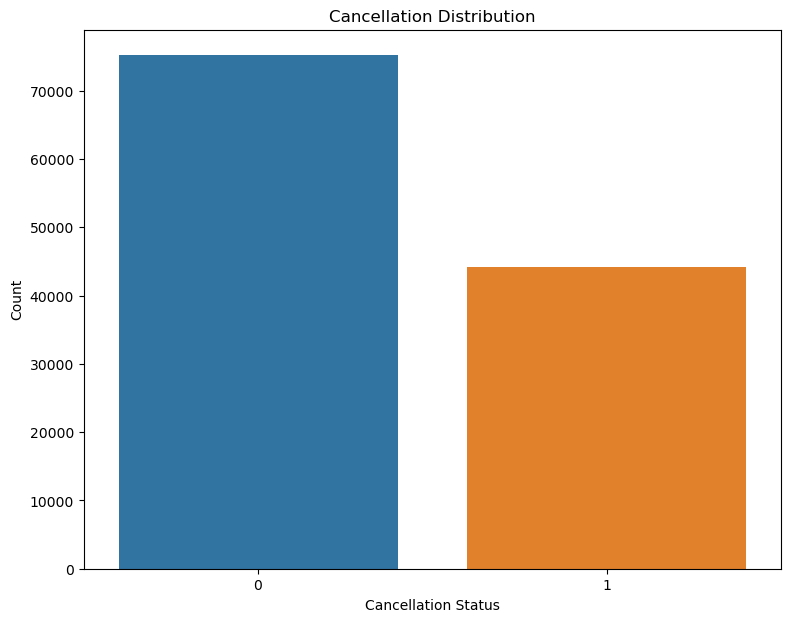

In [10]:
# Plot the distribution of 'is_canceled'
plt.figure(figsize=(9, 7))
sns.countplot(x='is_canceled', data=df)
plt.title('Cancellation Distribution')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

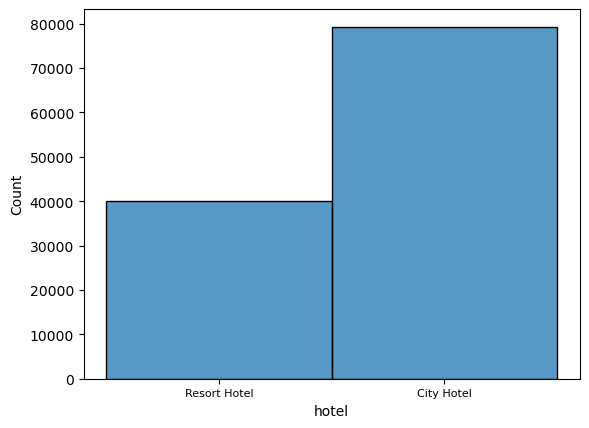

In [11]:
hist_plot = sns.histplot(df['hotel'])
hist_plot.tick_params(axis = 'x', labelsize = 8)

In [12]:
# Find the top 10 countries with the highest hotel booking
most_countries = df['country'].value_counts().nlargest(10)
print("10 countries with the most bookings:")
print(most_countries)

10 countries with the most bookings:
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


In [13]:
# Find the top 10 countries with the lowest hotel booking
least_countries = df['country'].value_counts().nsmallest(10)
print("10 countries with the least bookings:")
print(least_countries)

10 countries with the least bookings:
KIR    1
SDN    1
NCL    1
AIA    1
ASM    1
FJI    1
ATF    1
LCA    1
GUY    1
PYF    1
Name: country, dtype: int64


#### Feature Engineering

In [14]:
# Encoding Categorical Variables
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
# Date Features
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [16]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                  'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
                  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                  'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'year', 'month', 'day']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Split data into features and target
categorical_features = ['arrival_date_month', 'meal', 'country', 'distribution_channel', 'deposit_type', 'customer_type']
numerical_features = ['arrival_date_year', 'arrival_date_week_number', 'adults', 'children', 'babies', 'days_in_waiting_list', 'adr', 'total_of_special_requests']
target = 'is_canceled'

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features], df[target],
                                                    test_size = 0.3, random_state = 1234)

In [19]:
X_train

,arrival_date_month,meal,country,distribution_channel,deposit_type,customer_type,arrival_date_year,arrival_date_week_number,adults,children,babies,days_in_waiting_list,adr,total_of_special_requests
73639,1,3,85,3,0,2,1.192195,0.575875,0.247897,-0.260659,-0.081579,-0.131924,-0.056022,1.802026
83055,4,0,135,3,0,3,-0.221286,-1.776187,0.247897,-0.260659,-0.081579,2.312002,-0.986060,0.540666
276,5,0,59,3,0,2,-1.634768,0.061361,0.247897,-0.260659,10.181591,-0.131924,0.173519,-0.720694
2665,10,0,135,3,0,2,-1.634768,1.163891,0.247897,-0.260659,-0.081579,-0.131924,-0.709028,0.540666
105646,3,0,56,3,0,2,1.192195,-1.555681,0.247897,-0.260659,-0.081579,-0.131924,-0.147839,-0.720694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89460,8,0,56,3,0,3,-0.221286,-0.453152,0.247897,-0.260659,-0.081579,-0.131924,-0.728816,-0.720694
60620,9,0,135,3,1,2,-0.221286,1.457898,0.247897,-0.260659,-0.081579,-0.131924,-0.772349,-0.720694
34086,7,0,123,3,0,2,1.192195,-1.261674,0.247897,-0.260659,-0.081579,-0.131924,-0.699134,0.540666
58067,10,0,135,3,1,2,-0.221286,1.016887,0.247897,-0.260659,-0.081579,-0.131924,-0.234115,-0.720694


In [20]:
X_test

,arrival_date_month,meal,country,distribution_channel,deposit_type,customer_type,arrival_date_year,arrival_date_week_number,adults,children,babies,days_in_waiting_list,adr,total_of_special_requests
107255,7,0,59,3,0,2,1.192195,-1.261674,0.247897,-0.260659,-0.081579,-0.131924,-0.030298,4.324746
110092,0,0,59,3,0,2,1.192195,-0.820662,0.247897,-0.260659,-0.081579,-0.131924,-0.287147,0.540666
110457,0,0,135,0,0,2,1.192195,-0.747160,-1.478447,-0.260659,-0.081579,-0.131924,-0.709028,-0.720694
13366,1,0,135,3,0,2,1.192195,0.355369,1.974242,2.248414,-0.081579,-0.131924,4.712895,-0.720694
36222,8,0,25,3,0,2,1.192195,-0.600156,0.247897,-0.260659,-0.081579,-0.131924,0.526538,0.540666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72092,5,0,15,3,0,2,1.192195,0.134863,1.974242,-0.260659,-0.081579,-0.131924,0.412954,-0.720694
60284,9,0,135,3,1,2,-0.221286,1.384396,0.247897,-0.260659,-0.081579,-0.131924,-0.036234,-0.720694
16962,11,2,56,3,0,3,-1.634768,0.796381,0.247897,-0.260659,-0.081579,-0.131924,-0.465635,0.540666
16916,11,0,59,3,0,2,-1.634768,0.722879,0.247897,-0.260659,-0.081579,-0.131924,-0.929862,-0.720694


In [21]:
y_train

73639     1
83055     0
276       0
2665      0
105646    0
         ..
89460     0
60620     1
34086     0
58067     1
92975     0
Name: is_canceled, Length: 83573, dtype: int64

In [22]:
y_test

107255    0
110092    0
110457    0
13366     1
36222     0
         ..
72092     1
60284     1
16962     0
16916     0
33758     0
Name: is_canceled, Length: 35817, dtype: int64

#### Model Development

##### Predicting hotel booking cancellations is a classification problem because the predicted outcome is binary: canceled or not canceled. Therefore, we need to use classification algorithms while building the model.

##### We will implement the following three models:

1. Logistic Regression: Logistic regression is a commonly used binary classification algorithm. It can predict the probability of an event by using a logistic function

2. Decision Trees: Decision Trees predict the class of outcomes by creating a tree of decision rules.

3. Support Vector Machines (SVMs): SVMs are an effective binary classification algorithm that is particularly suited to small to medium sized complex datasets, and therefore well suited to our dataset.

##### 1. Logistic Regression

In [23]:
# Build a Logistic Regression Model to study the relationship between the features and the target variable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Create a Logistic Regression object
log_reg = LogisticRegression()

In [25]:
# Train the model using the training sets
log_reg.fit(X_train, y_train)

/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Print out the coefficients of the model
print("Coefficients of the model: ", log_reg.coef_)
print("Intercept of the model: ", log_reg.intercept_)
print("Features: ", X_train.columns)

Coefficients of the model:  [[-0.00977814  0.02061298  0.01007841  0.51693721  4.26705582 -0.22287154
   0.23101268  0.10645557  0.16147855  0.024344   -0.04057533 -0.02260423
   0.20693041 -0.46633127]]
Intercept of the model:  [-2.70597022]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


In [27]:
# Print out each of the coefficients and match them to the features.
for i in range(len(X_train.columns)):
    print("Coefficient of {} is {}".format(X_train.columns[i], log_reg.coef_[0][i]))

Coefficient of arrival_date_month is -0.009778140480864254
Coefficient of meal is 0.020612982344768212
Coefficient of country is 0.01007841197542333
Coefficient of distribution_channel is 0.516937208784051
Coefficient of deposit_type is 4.267055817227591
Coefficient of customer_type is -0.22287154448764376
Coefficient of arrival_date_year is 0.23101267589168853
Coefficient of arrival_date_week_number is 0.10645557163560108
Coefficient of adults is 0.16147855465770988
Coefficient of children is 0.02434399666677763
Coefficient of babies is -0.040575333652264726
Coefficient of days_in_waiting_list is -0.022604233514105513
Coefficient of adr is 0.20693041448603966
Coefficient of total_of_special_requests is -0.4663312735732894


- The coefficients of the model can be used to interpret the importance of each feature.
- The larger the absolute value of the coefficient, the more important the feature is.
- The sign of the coefficient indicates the direction of the relationship between the feature and the target variable.
- A positive coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship.

In [28]:
# In our case, how many coefficients are there?
print("Number of coefficients: ", len(log_reg.coef_[0]))


Number of coefficients:  14


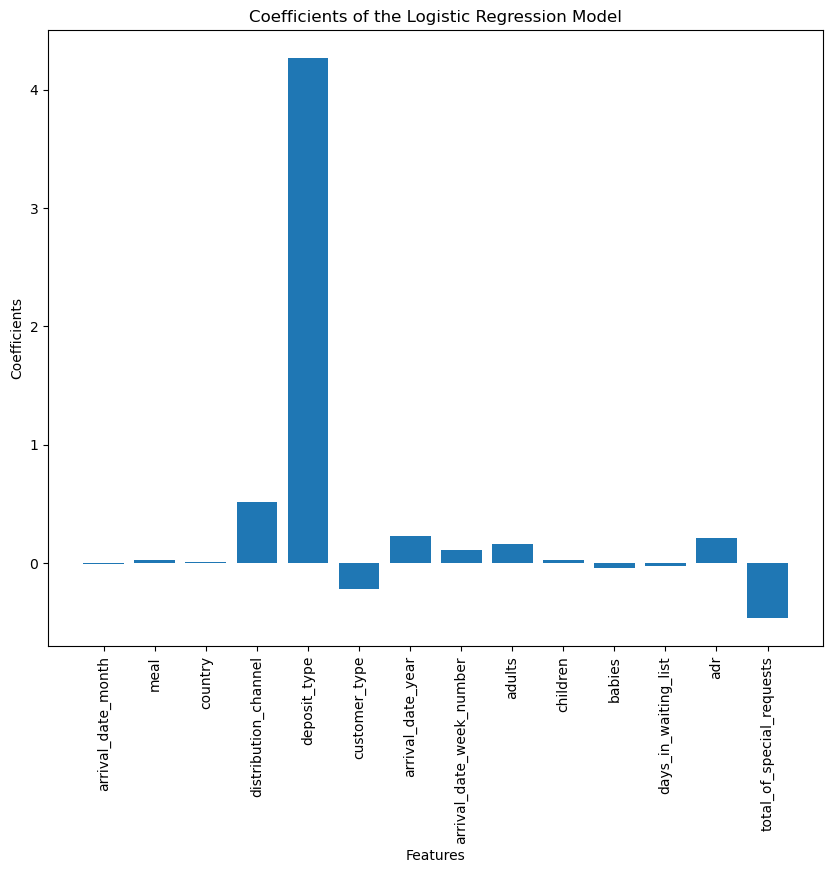

In [29]:
# Make an explanatory plot of the coefficients
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, log_reg.coef_[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of the Logistic Regression Model')
plt.show()

In [30]:
# Make predictions using the testing set
y_pred = log_reg.predict(X_test)

In [31]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7568752268475863
Confusion Matrix:


[[21222  1213]
 [ 7495  5887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     22435
           1       0.83      0.44      0.57     13382

    accuracy                           0.76     35817
   macro avg       0.78      0.69      0.70     35817
weighted avg       0.77      0.76      0.73     35817



##### Using hyperparameter tuning and cross-validation techniques to improve the logistic regression model we built above

In [32]:
# Using hyperparameter tuning and cross-validation techniques to improve the logistic regression model we built above
from sklearn.model_selection import GridSearchCV

In [33]:
# Create a Logistic Regression object
log_reg = LogisticRegression()

In [34]:
# Create a dictionary of hyperparameters to search
hyperparameters = {'penalty': ['l1', 'l2'],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create grid search
gridsearch = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0)

In [35]:
# Fit grid search
best_model = gridsearch.fit(X_train, y_train)

/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [36]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 100


In [37]:
# Make predictions using the testing set
y_pred = best_model.predict(X_test)

In [38]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7556746796214088
Confusion Matrix:
[[21283  1152]
 [ 7599  5783]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     22435
           1       0.83      0.43      0.57     13382

    accuracy                           0.76     35817
   macro avg       0.79      0.69      0.70     35817
weighted avg       0.77      0.76      0.73     35817



In [39]:
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)


True Negatives:  21283
False Positives:  1152
False Negatives:  7599
True Positives:  5783


Determine whether the model is good enough to be deployed?

Then We need to calculate accuracy, precision, recall, sensitivity, and F1 score
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- Sensitivity = TP / (TP + FN)
- F1 score = 2 * Precision * Recall / (Precision + Recall)

In [40]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.7556746796214088
Precision:  0.8338860850757029
Recall:  0.4321476610372142
Sensitivity:  0.4321476610372142
F1 Score:  0.569276960181129


In our case, we want to predict whether a customer will cancel the booking or not.
- If we predict that a customer will cancel the booking, but the customer actually does not cancel the booking, then we lose money. (FP)
- If we predict that a customer will not cancel the booking, but the customer actually cancels the booking, then we lose the opportunity to sell the room to another customer. (FN)

In our case, just to make it clear:
- TP means that the model correctly predicted that the booking was canceled when it actually was canceled.
- FP means that the model incorrectly predicted that the booking was canceled when it actually was not canceled.
- TN means that the model correctly predicted that the booking was not canceled when it actually was not canceled.
- FN means that the model incorrectly predicted that the booking was not canceled when it actually was canceled.

In our case, we want to minimize the number of False Positives (FP) and False Negatives (FN).
Therefore, we should assess the sensitivity of the model.

Why do we want to minimize the false negatives?
- False negatives are the cases where the model predicts the negative class when it should have predicted the positive class.
- In our case, a false negative is when the model predicts that a booking will not be canceled when it actually will be canceled.

This is a problem because the hotel will not be prepared for the cancellation and will not be able to fill the room with another booking.
This will result in a loss of revenue for the hotel.

Our sensitivity is 0.43, which is relatively low.
So, we can say that our model is not good enough.
Because it means that our model can correctly predict 43% of the customers who will cancel the booking.

In [41]:
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]

In [43]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

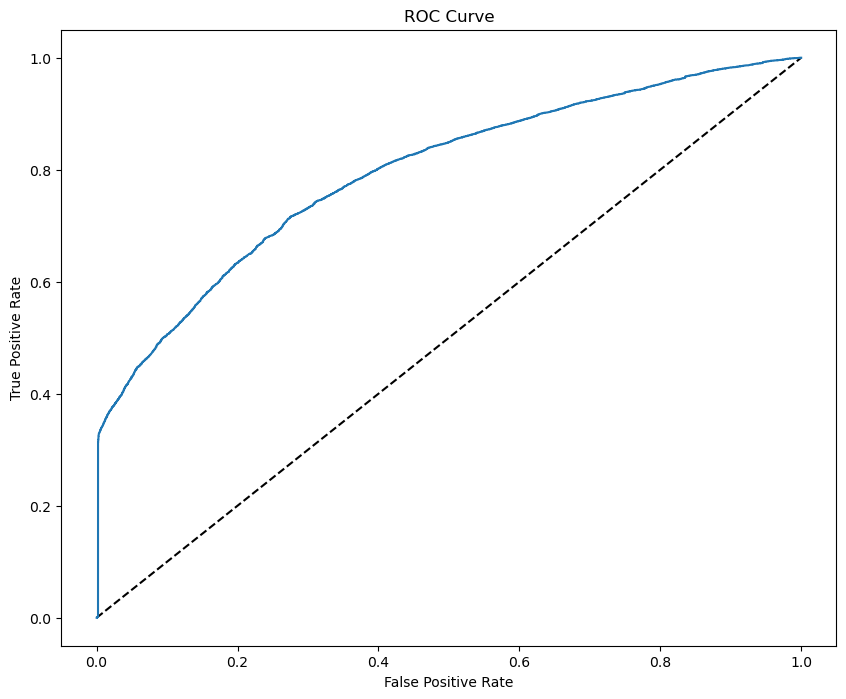

In [44]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [45]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.7942042134575192


How to assess AUC score?
- AUC score is a measure of how well the model is able to distinguish between the classes.
- AUC score of 0.5 means that the model is not able to distinguish between the classes.
- AUC score of 1 means that the model is able to perfectly distinguish between the classes.

AUC score of 0.79 indicates that the model is pretty good at distinguishing between positive and negative classes.

In our case, the positive class is 'is_canceled' = 1, and the negative class is 'is_canceled' = 0.
AUC score of 0.79 indicates that the model is very good at distinguishing between canceled and not canceled bookings.

Note: 
- AUC 0f 0.79 does not say anything in terms of predicting whether a booking will be canceled or not.
- AUC score of 0.79 only indicates that the model is very good at distinguishing between canceled and not canceled bookings.

----------------

#### Key insights from our logistic regression model:

1. Accuracy: Accuracy is the percentage of outcomes (both true examples and true counterexamples) that the model predicts correctly out of all cases. In our case, an accuracy of 0.75 means that the model predicts correctly 75% of the time.

2. Precision: Precision is the percentage of true positive cases out of the sample predicted to be positive cases (in this case, canceled bookings). In our case, a precision of 0.83 means that 83% of the cases predicted by the model to be canceled are actually canceled.

3. Recall: Recall is the percentage of true positive cases (in this case, canceled bookings) that were correctly predicted. In our case, a recall of 0.43 means that only 43% of the actual cancelations were correctly predicted by the model.

4. Sensitivity: Sensitivity is actually recall, so in our case a sensitivity of 43 could mean a recall of 43%.

5. F1 Score (F1 value): The F1 value is the harmonic mean of precision and recall, in order to find a balance between the two. In our case, an F1 value of 0.56 means that the model achieves a better balance between precision and recall.

These metrics tell us how well the model is performing in predicting canceled bookings. 
- The model has a high precision rate, meaning that the model tends to predict correctly when predicting canceled bookings. 
- However, the model's recall is low, meaning that a large proportion of actual cancellations are not predicted by the model. 
- The F1 value indicates how well the model balances precision and recall, and a value of 0.56 means that there is room for improvement in the model's balance between the two.

-------------

##### 2. Decision Trees

In [46]:
# Build a Decision Tree Model to study the relationship between the features and the target variable
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Create a Decision Tree object
dt = DecisionTreeClassifier()

In [48]:
# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# Make predictions using the testing set
y_pred = dt.predict(X_test)

In [50]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8098947427199374
Confusion Matrix:
[[19064  3371]
 [ 3438  9944]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22435
           1       0.75      0.74      0.74     13382

    accuracy                           0.81     35817
   macro avg       0.80      0.80      0.80     35817
weighted avg       0.81      0.81      0.81     35817



In [51]:
# How do I know which features are important in the Decision Tree model?
# Print out the feature importances
print("Feature Importances: ", dt.feature_importances_)
print("Features: ", X_train.columns)

Feature Importances:  [0.03460592 0.0281493  0.09925989 0.03884458 0.2448898  0.03723599
 0.03998661 0.13860196 0.02960338 0.01300119 0.00194907 0.00368931
 0.25213851 0.03804448]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


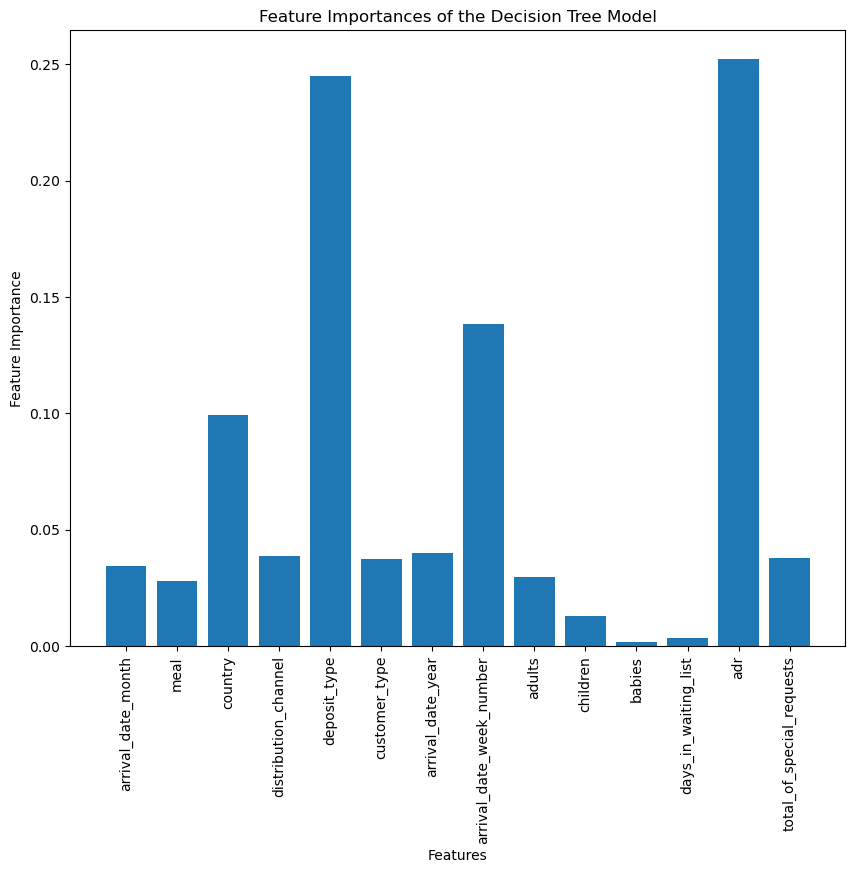

In [52]:
# Make an explanatory plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, dt.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree Model')
plt.show()

High feature importance does not necessarily mean that the feature is important for prediction.

It only means that the feature is important for the Decision Tree model to split the data.

For example, if a feature has a high feature importance, but it is not important for prediction,
then we can remove the feature from the model without affecting the performance of the model.

In our case, we can remove the 'arrival_date_year' feature from the model without affecting the performance of the model.

In [53]:
# Is our decision tree better than our logistic regression?
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)


True Negatives:  19064
False Positives:  3371
False Negatives:  3438
True Positives:  9944


In [54]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.8098947427199374
Precision:  0.7468268869695832
Recall:  0.7430877297862801
Sensitivity:  0.7430877297862801
F1 Score:  0.7449526163988462


In [55]:
# Does this mean that our decision tree is better than our logistic regression?
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt.predict_proba(X_test)[:,1]

In [57]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

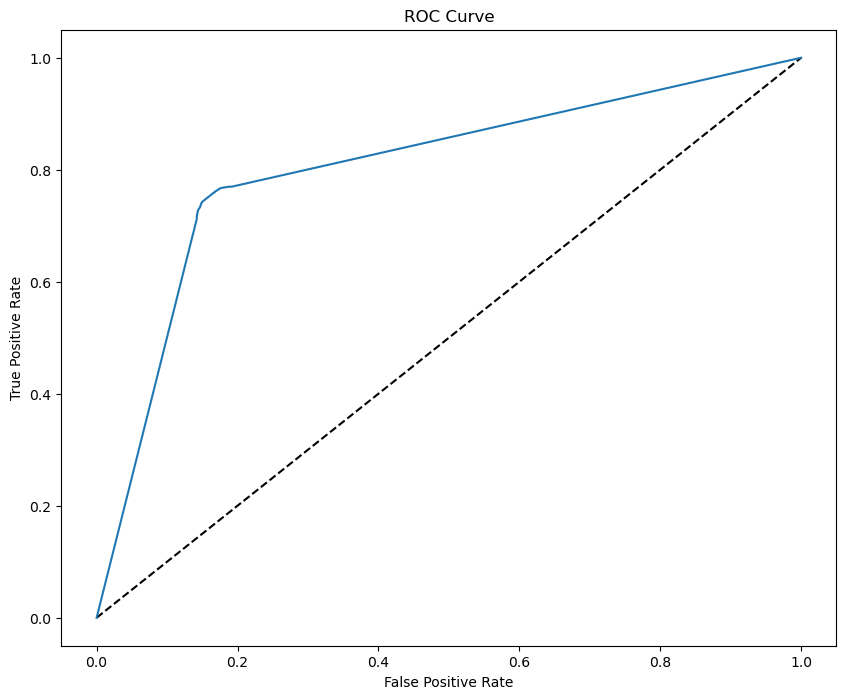

In [58]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.8032960877330838


In [60]:
# Using hyperparameter tuning and cross-validation techniques to improve the decision tree model we built above
from sklearn.model_selection import GridSearchCV

In [61]:
# Create a Decision Tree object
dt = DecisionTreeClassifier()
# Create a dictionary of hyperparameters to search
hyperparameters = {'criterion': ['gini', 'entropy'],
                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Create grid search
gridsearch = GridSearchCV(dt, hyperparameters, cv=5, verbose=0)

In [62]:
# Fit grid search
best_model = gridsearch.fit(X_train, y_train)
# View best hyperparameters
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 10
Best min_samples_split: 4


In [63]:
# Make predictions using the testing set
y_pred = best_model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.8011837954044169
Confusion Matrix:
[[19961  2474]
 [ 4647  8735]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     22435
           1       0.78      0.65      0.71     13382

    accuracy                           0.80     35817
   macro avg       0.80      0.77      0.78     35817
weighted avg       0.80      0.80      0.80     35817

True Negatives:  19961
False Positives:  2474
False Negatives:  4647
True Positives:  8735
Accuracy:  0.8011837954044169
Precision:  0.779284503523954
Recall:  0.6527424899118218
Sensitivity:  0.6527424899118218
F1 Score:  0.7104225123012484


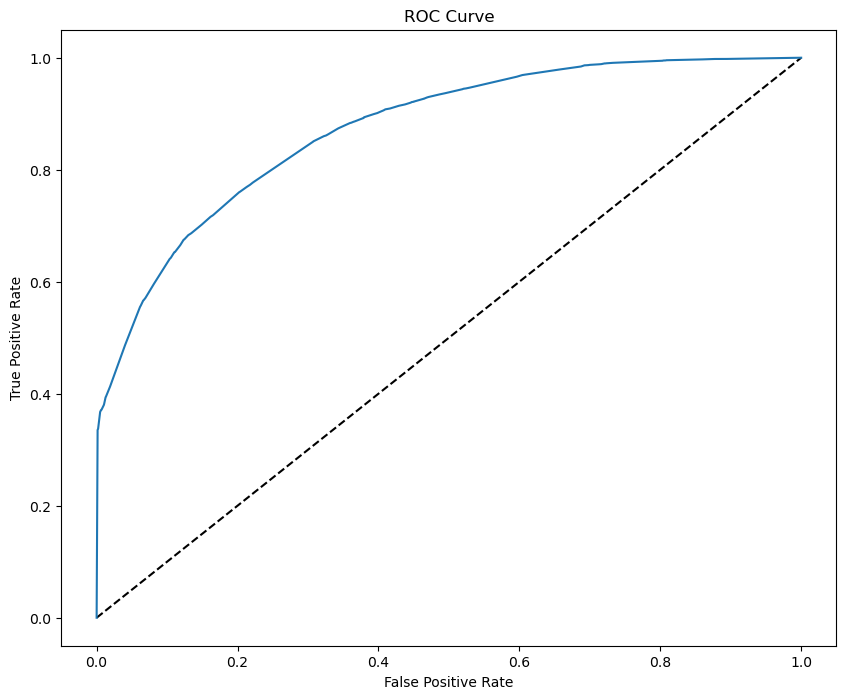

AUC:  0.8721812814695049


In [64]:
# Is this decision tree better than the previous one?
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

After Using hyperparameter tuning and cross-validation techniques, we can see that the ROC curve performs better, and the AUC score improves from 0.80 to 0.87.

In predicting the cancellation of a hotel booking, a "positive example" may indicate that the booking will be canceled, while a "negative example" indicates that the booking will not be canceled. Our model generates a prediction score for each booking that indicates the likelihood that the booking will be canceled.

The ROC curve here depicts how the proportion of true instances (actual cancellations that are predicted to be canceled) and false positive instances (actual non-cancellations that are predicted to be canceled) identified by the model changes as we change the threshold at which the model predicts that the booking will be canceled. Ideally, we would like the model to maximize the true cases while minimizing the false positive cases, so that the model's performance on the ROC curve would be closer to the upper left corner.

The AUC score here represents the area under the ROC curve, that is, the ability of the model to correctly predict whether a reservation will be canceled or not for all possible thresholds. the higher the AUC score, the better the predictive performance of the model. the AUC score ranges from 0.5 (which is equivalent to a random guess) to 1 (which is a perfect prediction).

Our AUC score improves from 0.80 to 0.87. meaning that our model's performance in predicting whether a hotel reservation will be canceled or not is improved. The ability of the model to correctly distinguish between a booking being canceled and not canceled improves in all possible scenarios where the threshold changes.



-----------------

#### Key insights from the Decision Tree Model:

1. Accuracy: 0.801 means that the model can correctly predict whether a reservation will be canceled about 80.1% of the time. Accuracy is a good place to start in evaluating a model, but is not fully representative of the model's performance, especially if the data is unbalanced.

2. Precision: 0.779 means that about 77.9% of all cases predicted by the model as "canceled booking" were actually "canceled bookings". This is a pretty good precision rate, and indicates that the model is highly reliable in predicting cancellations.

3. Recall/Sensitivity: 0.653 means that the model correctly predicted 65.3% of all actual "canceled reservations". This recall indicates that although the model may miss some actual cancellations in some cases, it is still able to capture most of them.

4. F1 Score (F1 value): The F1 value of 0.710 is the reconciled average of the precision and recall rates to find a balance between the two. an F1 value of 0.71 indicates that the model has achieved a relatively good balance between precision and recall.

Overall, the performance of this decision tree model is quite good with high accuracy and reliability. However, we can still make further improvements to increase the recall of the model in order to capture more actual canceled bookings.

#### It's worth pointing out:
A prescision of 0.779 means that about 77.9% of all bookings predicted by the model as "canceled" were actually canceled. This is a very high precision rate and shows that the model is very reliable in predicting canceled bookings.

In other words, if our model predicts that a reservation will be canceled, there is about a 78% probability that the reservation will actually be canceled. This is very useful for hotel managers as they can rely on this model to predict and manage booking cancellations to manage resources and optimize operations more efficiently.

--------------

#### Compare Logistic regression with Decision Tree

Logistic regression model:
- Accuracy: 0.75
- Precision: 0.83
- Recall: 0.43
- F1 Score: 0.56

Decision Tree Model:
- Accuracy: 0.801
- Precision: 0.779
- Recall: 0.653
- F1 Score: 0.710

In terms of accuracy, the decision tree model (0.801) performs better than the logistic regression model (0.75).

In terms of prescision, the Logistic regression model (0.83) performs slightly better than the decision tree model (0.779).

In terms of recall, the decision tree model (0.653) performs better than the logistic regression model (0.43).

In terms of F1 value, the decision tree model (0.710) also performs better than the Logistic regression model (0.56).

##### In terms of accuracy, the logistic regression model performed only slightly better (0.83) than the decision tree model (0.779). In other words, the logistic regression model has a slightly higher probability of correctly predicting a situation where the prediction is a "canceled reservation" (i.e., a positive case).

##### The Decision Tree Model outperforms the Logistic Regression Model (0.43) completely in the assessment of recall (0.653). In other words, the decision tree model correctly identifies a higher percentage of all real "canceled reservations" (i.e., positive cases).

##### Thus, overall, the decision tree model seems to perform better than the Logistic regression model in this case because of its higher accuracy, recall and F1 value. 

However, which model is more suitable also depends on your specific business needs. For example, if you're more concerned about avoiding incorrectly predicting canceled bookings (i.e., you'd prefer to increase the precision rate), then Logistic Regression might be better. And if you want to capture more actual canceled bookings (i.e., you'd prefer to improve recall), then Decision Tree might be better.

--------------

##### 3. Support Vector Machines

In [65]:
# Build a support vector machine model to study the relationship between the features and the target variable to predict the cancellation of hotel bookings
from sklearn.svm import SVC
# Create a SVC object
svc = SVC()
# Train the model using the training sets
svc.fit(X_train, y_train)

SVC()

In [66]:
# Print out the support vectors of the model with the associated labels
print("Support vectors of the model: ", svc.support_vectors_)
print("Labels of the support vectors: ", svc.support_)
print("Number of support vectors for each class: ", svc.n_support_)
print("Coefficients of the support vector in the decision function: ", svc.dual_coef_)
print("Intercept of the model: ", svc.intercept_)
print("Indices of the support vectors: ", svc.support_)
print("Number of support vectors: ", len(svc.support_))


Support vectors of the model:  [[ 4.00000000e+00  0.00000000e+00  1.35000000e+02 ...  2.31200151e+00
  -9.86060175e-01  5.40665852e-01]
 [ 1.00000000e+01  0.00000000e+00  1.35000000e+02 ... -1.31923599e-01
  -7.09027630e-01  5.40665852e-01]
 [ 3.00000000e+00  0.00000000e+00  5.60000000e+01 ... -1.31923599e-01
  -1.47838844e-01 -7.20694110e-01]
 ...
 [ 1.00000000e+00  0.00000000e+00  1.35000000e+02 ... -1.31923599e-01
  -7.88179785e-01 -7.20694110e-01]
 [ 9.00000000e+00  0.00000000e+00  1.00000000e+02 ... -1.31923599e-01
  -9.46484097e-01 -7.20694110e-01]
 [ 1.00000000e+00  3.00000000e+00  2.90000000e+01 ... -1.31923599e-01
  -3.23160869e-01 -7.20694110e-01]]
Labels of the support vectors:  [    1     3     4 ... 83558 83563 83565]
Number of support vectors for each class:  [25120 25095]
Coefficients of the support vector in the decision function:  [[-1. -1. -1. ...  1.  1.  1.]]
Intercept of the model:  [-1.38222723]
Indices of the support vectors:  [    1     3     4 ... 83558 83563 8

In [67]:
# Make predictions using the testing set
y_pred = svc.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.7548650082363124
Confusion Matrix:
[[20550  1885]
 [ 6895  6487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82     22435
           1       0.77      0.48      0.60     13382

    accuracy                           0.75     35817
   macro avg       0.76      0.70      0.71     35817
weighted avg       0.76      0.75      0.74     35817

True Negatives:  20550
False Positives:  1885
False Negatives:  6895
True Positives:  6487
Accuracy:  0.7548650082363124
Precision:  0.7748447204968945
Recall:  0.4847556419070393
Sensitivity:  0.4847556419070393
F1 Score:  0.5963960650914774


##### It seems that the accuracy, precision, recall and F1 score of the svm model are not as good as that of the decision tree. The precision is pretty high, however, the sensitivity is low.

#### 4. K-nearest Neighbors

In [73]:
# Build a k-nearest neighbors model to study the relationship between the features and the target variable to predict the cancellation of hotel bookings
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN object
knn = KNeighborsClassifier()
# Train the model using the training sets
knn.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = knn.predict(X_test)

In [75]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.802579780551135
Confusion Matrix:
[[19381  3054]
 [ 4017  9365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     22435
           1       0.75      0.70      0.73     13382

    accuracy                           0.80     35817
   macro avg       0.79      0.78      0.79     35817
weighted avg       0.80      0.80      0.80     35817

True Negatives:  19381
False Positives:  3054
False Negatives:  4017
True Positives:  9365
Accuracy:  0.802579780551135
Precision:  0.7540864803929463
Recall:  0.699820654610671
Sensitivity:  0.699820654610671
F1 Score:  0.72594085500562


In [76]:
# Apply the k-fold cross-validation technique to improve the KNN model we built above
from sklearn.model_selection import cross_val_score
# Create a KNN object
knn = KNeighborsClassifier()
# Perform 5-fold cross validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# Print out each cv score (accuracy) and average them
print("Cross-validation scores: ", cv_scores)
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

Cross-validation scores:  [0.7930003  0.80161532 0.79539336 0.79705636 0.79615891]
Average cross-validation score: 0.80


On the problem of predicting hotel booking cancellations, we evaluated it through five-fold cross-validation. Five-fold cross-validation means that the data is divided into five subsets, and the model is trained on four of these subsets and validated on the remaining one. This process is repeated five times, with each subset having one chance to become a validation set.

The five scores 0.7930003, 0.80161532, 0.79539336, 0.79705636, and 0.79615891 correspond to the accuracies of the five cross-validations. The average of these five scores (0.80) is an overall assessment of the model's predictive ability. This average provides a more comprehensive assessment than the accuracy of a single validation because it takes into account the model's performance on different subsets of data.

This average cross-validation score (0.80) indicates that the model is approximately 80% accurate on the task of predicting whether a hotel reservation will be canceled. This is a relatively high score, indicating that the model performs well on this task.

##### Decision: Which model should we use?

Since we want to focus on the minimizing the following circumstances:
- If we predict that a customer will cancel the booking, but the customer actually does not cancel the booking, then we lose money. (FP)
- If we predict that a customer will not cancel the booking, but the customer actually cancels the booking, then we lose the opportunity to sell the room to another customer. (FN)

Evaluation metrics for KNN models:

- Precision: 0.754
- Recall: 0.7
- F1 Score: 0.726

Evaluation metrics for decision tree model:

- Precision: 0.779
- Recall: 0.653
- F1 Score: 0.710

In terms of Precision and F1 Score, the Decision Tree Model performs better, which means it is better in reducing false positives (FP) and false negatives (FN).

And in terms of recall, the KNN model performs better, which means it is better at finding all true positive cases (i.e., reducing false negatives).

So, if you want to minimize false positives (FP) and false negatives (FN) and balance the two, the decision tree model may be a better choice because it has a higher F1 score.

Note: It also depends on which error type you prefer to minimize. If you prefer to reduce false negatives (FN, which are actually "canceled" but predicted to be "not canceled"), then the KNN model may be better because it has higher recall.

##### To summarize, we chose the Decision Trees as our final model.